In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with = engine)
# reflect the tables

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
Base.classes.measurement.__dict__

mappingproxy({'__table__': Table('measurement', MetaData(), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None),
              '__module__': 'sqlalchemy.ext.automap',
              '__doc__': None,
              '_sa_class_manager': <ClassManager of <class 'sqlalchemy.ext.automap.measurement'> at 23771f2adb0>,
              '__init__': <function sqlalchemy.orm.instrumentation.__init__(self, **kwargs)>,
              'id': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x23771f2aed0>,
              'station': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x23771f2af30>,
              'date': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x23771f2b0b0>,
              'prcp': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x23771f2b230>,
       

In [10]:
Base.classes.station.__dict__

mappingproxy({'__table__': Table('station', MetaData(), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None),
              '__module__': 'sqlalchemy.ext.automap',
              '__doc__': None,
              '_sa_class_manager': <ClassManager of <class 'sqlalchemy.ext.automap.station'> at 23771f2acf0>,
              '__init__': <function sqlalchemy.orm.instrumentation.__init__(self, **kwargs)>,
              'id': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x23771f2b530>,
              'station': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x23771f2b6b0>,
              'name': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x23771f2b830>,
              'latitude': <sqlalchemy.orm.attributes.InstrumentedAttr

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
last_month = session.query(Measurement).order_by(Measurement.date.desc()).first()
last_date = last_month.date
last_date

'2017-08-23'

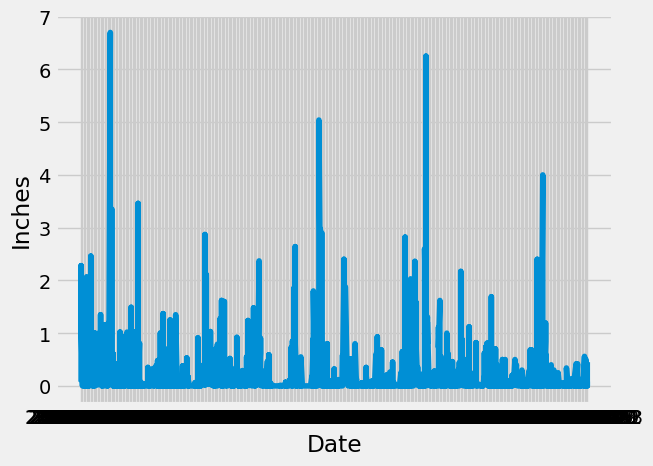

In [37]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_dates = last_date.split('-')
last_date_year = int(last_dates[0])
last_date_month = int(last_dates[1]) 
last_date_day = int(last_dates[2])
year_ago = str(dt.date(last_date_year,last_date_month,last_date_day) - dt.timedelta(days = 365))
year_ago
# Perform a query to retrieve the data and precipitation scores
conn = engine.connect()
last_year_df = pd.read_sql(f"select date,prcp from measurement where date <= '{last_date}' and date > '{year_ago}'", conn)

# Save the query results as a Pandas DataFrame and set the index to the date column
# last_year_df.set_index('date')
# Sort the dataframe by date
last_year_df = last_year_df.set_index('date').sort_index().dropna()


date = last_date
xaxis = [date]
i = 1
while i < 5:
    dates = date.split('-')
    date_year = int(dates[0])
    date_month = int(dates[1]) 
    date_day = int(dates[2])
    date = str(dt.date(last_date_year,last_date_month,last_date_day) - dt.timedelta(days = 73))
    xaxis.append(date)
    i += 1
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(last_year_df['prcp'])
plt.xlabel('Date')
plt.ylabel('Inches')
# plt.xlim(year_ago,last_date)
plt.show()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [38]:
# Design a query to calculate the total number stations in the dataset
stations=[]
for s in session.query(Station.station).all():
    stations.append(s.station)
len(stations)

9

In [39]:
for m in session.query(Measurement.station).all():
    print(m.station)

USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC0

In [40]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_station = ''
stations_list = []
active_counts = []
for station in stations:
    active_count = 0
    for m in session.query(Measurement.station).all():    
        if m.station == station:
            active_count += 1
    print(station,active_count)
    active_counts.append(active_count)
    stations_list.append(station)  
    

most_active_station = stations_list[active_counts.index(max(active_counts))]
most_active_station_count = max(active_counts)
print(f'The most active station is {most_active_station} with {most_active_station_count}')

USC00519397 2724
USC00513117 2709
USC00514830 2202
USC00517948 1372
USC00518838 511
USC00519523 2669
USC00519281 2772
USC00511918 1979
USC00516128 2612
The most active station is USC00519281 with 2772


In [41]:
conn = engine.connect()
df = pd.read_sql("select * from measurement",conn)
df

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [42]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temps = engine.execute(f"SELECT tobs FROM measurement where station = '{most_active_station}'")
mas_temps = []
for t in temps:
    mas_temps.append(t[0])
print(f'{most_active_station} Temps:\nLowest: {min(mas_temps)}\nHighest: {max(mas_temps)}\nAverage: {sum(mas_temps)/len(mas_temps)}')

USC00519281 Temps:
Lowest: 54.0
Highest: 85.0
Average: 71.66378066378067


Text(0, 0.5, 'Frequency')

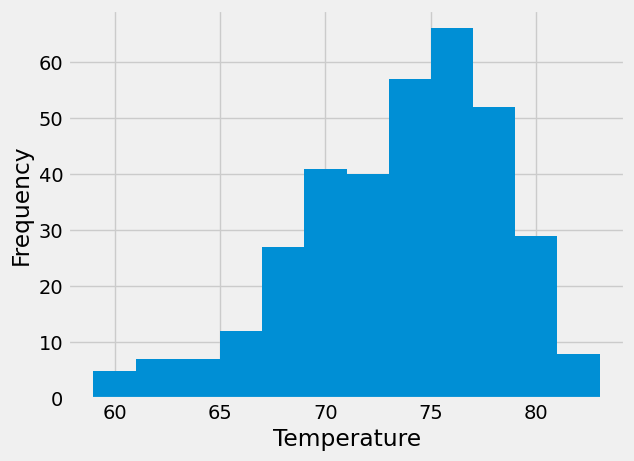

In [51]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station_df = pd.read_sql(f"select date,tobs from measurement where date <= '{last_date}' and date > '{year_ago}' and station = '{most_active_station}'", conn)
plt.hist(most_active_station_df['tobs'],bins = 12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Close session

In [52]:
# Close Session
session.close()